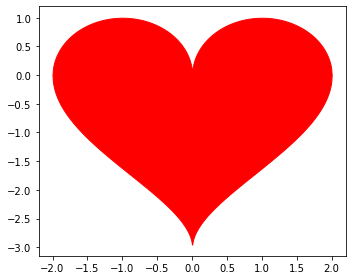

In [2]:
import numpy as np
from matplotlib import pyplot as plt

plt.rcParams["figure.figsize"] = [5, 4]
plt.rcParams["figure.autolayout"] = True

x = np.linspace(-2, 2, 1000)
y1 = np.sqrt(1 - (abs(x)-1)**2)
y2 = -3 * np.sqrt(1- (abs(x)/2)**0.5)

plt.fill_between(x, y1, color = 'red')
plt.fill_between(x, y2, color = 'red')

plt.show()

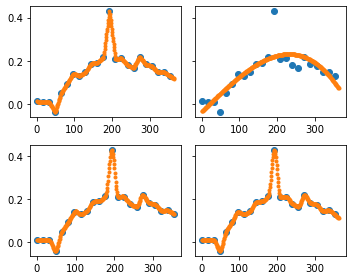

In [7]:
import numpy as np
import matplotlib.pyplot as plt

data = np.loadtxt("PicnicPointEVI.csv", delimiter=',', skiprows =1)
year = data[:, 0]
doy = data[:, 1]
evi = data[:, 2]

from scipy import interpolate as intp

f, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, sharey='row')

interp_func = intp.interp1d(doy, evi, fill_value = 'extrapolate')
xi = np.arange(1, 365)
yi = interp_func(xi)

ax1.plot(doy, evi, 'o')
ax1.plot(xi, yi, '.')

interp_func = intp.UnivariateSpline(doy, evi)
xi = np.arange(1, 365)
yi = interp_func(xi)
ax2.plot(doy, evi, 'o')
ax2.plot(xi, yi, '.')

interp_func = intp.Akima1DInterpolator(doy, evi)
xi = np.arange(1, 365)
yi = interp_func(xi)
ax3.plot(doy, evi, 'o')
ax3.plot(xi, yi, '.')

interp_func = intp.PchipInterpolator(doy, evi)
xi = np.arange(1, 365)
yi = interp_func(xi)
ax4.plot(doy, evi, 'o')
ax4.plot(xi, yi, '.')

<AxesSubplot:>

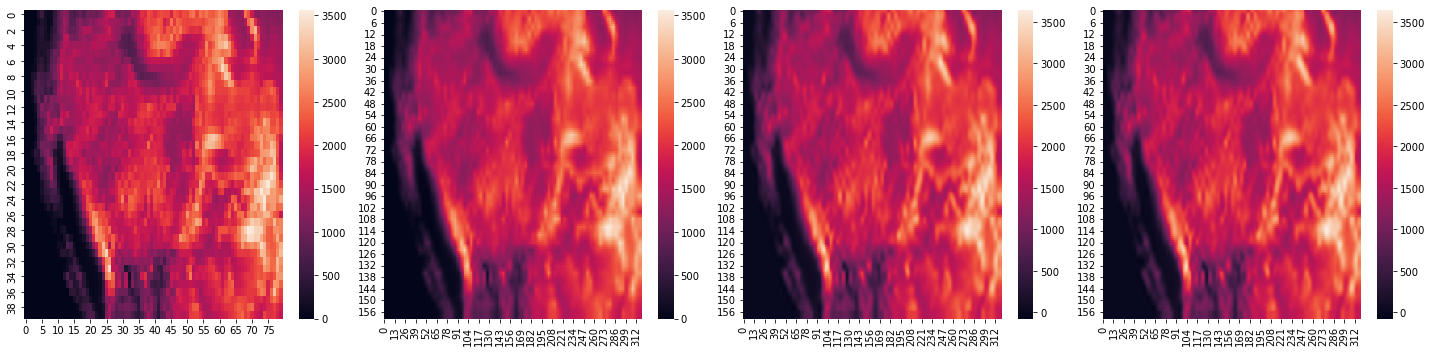

In [19]:
# 2d interpolation
import numpy as np
import matplotlib.pyplot as plt
from scipy import interpolate as intp
import seaborn as sns

filename = "globalelev.txt"
elev = np.loadtxt(filename)
elev = elev[180:220, 220:300]

fig, axes = plt.subplots(1, 4, figsize=(20, 5))

sns.heatmap(elev, ax = axes[0])

nlat, nlon  = elev.shape
x = np.arange(0, nlat)
y = np.arange(0, nlon)

xi = np.arange(0, nlat, 1/4)
yi = np.arange(0, nlon, 1/4)

interp_func = intp.interp2d(y, x, elev, kind = 'linear')
zi = interp_func(yi, xi)
sns.heatmap(zi, ax=axes[1])

interp_func = intp.interp2d(y, x, elev, kind = 'cubic')
zi = interp_func(yi, xi)
sns.heatmap(zi, ax=axes[2])

interp_func = intp.RectBivariateSpline(x, y, elev)
zi = interp_func(xi, yi)
sns.heatmap(zi, ax=axes[3])


In [8]:
from scipy.optimize import minimize

def objfunc(x):
    return abs(x**2 - 7)
mymin = minimize(objfunc, -1, method='Nelder-Mead')
print(mymin)

 final_simplex: (array([[-2.64570313],
       [-2.64580078]]), array([0.00025497, 0.00026177]))
           fun: 0.0002549743652169312
       message: 'Optimization terminated successfully.'
          nfev: 36
           nit: 18
        status: 0
       success: True
             x: array([-2.64570313])
